In [1]:
# Environment preparation
import sys
!pip install expectexception

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Preparing environment
import expectexception

# %%expect_exception TypeError

In [3]:
!ls sample_data/

anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


#TASK #1: PROBLEM STATEMENT AND PROJECT OVERVIEW

![alt text](https://drive.google.com/uc?id=1qOZKOEs_N-SbkO2vqlsxpXfHAqjZLw1p)

#TASK #2: IMPORT DATASETS AND LIBRARIES

In [4]:
# # Mount the drive
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from copy import copy
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [7]:
# Read the stock data csv file, here's the list of the stocks considered:

# AAPL = Apple Stock 
# BA = Boeing 
# T = AT&T
# MGM = MGM Resorts International (Hotel Industry)
# AMZN = Amazon
# IBM = IBM
# TSLA = Tesla Motors
# GOOG = Google 
# sp500 = US Stock Market (S&P 500 is a stock market index that measures the stock performance of 500 large companies listed on U.S. stock exchange)
# Check the list of S&P 500 companies here: https://en.wikipedia.org/wiki/List_of_S%26P_500_companies

stocks_df = pd.read_csv('sample_data/stocks.csv')
stocks_df

Date        AAPL          BA          T        MGM         AMZN  \
0     2012-01-12   60.198570   75.510002  30.120001  12.130000   175.929993   
1     2012-01-13   59.972858   74.599998  30.070000  12.350000   178.419998   
2     2012-01-17   60.671429   75.239998  30.250000  12.250000   181.660004   
3     2012-01-18   61.301430   75.059998  30.330000  12.730000   189.440002   
4     2012-01-19   61.107143   75.559998  30.420000  12.800000   194.449997   
...          ...         ...         ...        ...        ...          ...   
2154  2020-08-05  440.250000  174.279999  29.850000  16.719999  3205.030029   
2155  2020-08-06  455.609985  172.199997  29.840000  18.459999  3225.000000   
2156  2020-08-07  444.450012  170.020004  30.020000  19.030001  3167.459961   
2157  2020-08-10  450.910004  179.410004  30.200001  21.650000  3148.159912   
2158  2020-08-11  437.500000  180.130005  30.200001  21.500000  3080.669922   

             IBM         TSLA         GOOG        sp500  
0     180.550003    28.250000   313.644379  1295.500000  
1     179.160004    22.790001   311.328064  1289.089966  
2     180.000000    26.600000   313.116364  1293.670044  
3     181.070007    26.809999   315.273285  1308.040039  
4     180.520004    26.760000   318.590851  1314.500000  
...          ...          ...          ...          ...  
2154  125.449997  1485.020020  1473.609985  3327.770020  
2155  126.120003  1489.579956  1500.099976  3349.159912  
2156  124.959999  1452.709961  1494.489990  3351.280029  
2157  127.110001  1418.569946  1496.099976  3360.469971  
2158  126.750000  1374.390015  1480.319946  3333.689941  

[2159 rows x 10 columns]

In [8]:
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2159 non-null   object 
 1   AAPL    2159 non-null   float64
 2   BA      2159 non-null   float64
 3   T       2159 non-null   float64
 4   MGM     2159 non-null   float64
 5   AMZN    2159 non-null   float64
 6   IBM     2159 non-null   float64
 7   TSLA    2159 non-null   float64
 8   GOOG    2159 non-null   float64
 9   sp500   2159 non-null   float64
dtypes: float64(9), object(1)
memory usage: 168.8+ KB


In [9]:
# Sort the stock data by date
stocks_df.sort_values(by=['Date'], inplace=True)

In [10]:
# Print out the number of stocks
print('Total Number of stocks : {}'.format(len(stocks_df.columns[1:])))

Total Number of stocks : 9


In [11]:
# Print the name of stocks
print('Stocks under consideration are: \n{}'.format(list(stocks_df.columns[1:])))

Stocks under consideration are: 
['AAPL', 'BA', 'T', 'MGM', 'AMZN', 'IBM', 'TSLA', 'GOOG', 'sp500']


**MINI CHALLENGE #1:** 
- **What is the average return of the S&P500?**
- **Which stock or index has the minimum dispertion from the mean in dollar value?**
- **What is the maximum price for AMZN stock over the specified time period?** 

In [12]:
# What is the average return of the S&P500?
stocks_df['sp500'].mean()

2218.7495540592868

In [13]:
# Which stock or index has the minimum dispertion from the mean in dollar value?
#dispertion = stocks_df.describe().loc['std']
dispertion = stocks_df.std(numeric_only=True)
print(dispertion)

print('\nThe minimuun dispertion is in: {}'.format(dispertion.idxmin()))

AAPL      70.827601
BA       103.678586
T          3.207490
MGM        6.963847
AMZN     697.838905
IBM       25.561938
TSLA     210.988003
GOOG     334.448057
sp500    537.321727
dtype: float64

The minimuun dispertion is in: T


In [14]:
stocks_df.describe()

AAPL           BA            T          MGM         AMZN  \
count  2159.000000  2159.000000  2159.000000  2159.000000  2159.000000   
mean    140.819823   189.942700    35.162899    23.105743   915.665665   
std      70.827601   103.678586     3.207490     6.963847   697.838905   
min      55.790001    67.239998    26.770000     7.140000   175.929993   
25%      89.165714   124.015000    33.040001    18.545000   316.490005   
50%     116.599998   142.419998    34.930000    23.780001   676.010010   
75%     175.019997   297.044998    37.419998    28.430000  1593.645019   
max     455.609985   440.619995    43.470001    38.029999  3225.000000   

               IBM         TSLA         GOOG        sp500  
count  2159.000000  2159.000000  2159.000000  2159.000000  
mean    161.853001   259.600815   783.712512  2218.749554  
std      25.561938   210.988003   334.448057   537.321727  
min      94.769997    22.790001   278.481171  1278.040039  
25%     142.769997   184.595001   527.214416  1847.984985  
50%     156.949997   231.960007   737.599976  2106.629883  
75%     185.974998   307.350006  1079.744995  2705.810059  
max     215.800003  1643.000000  1568.489990  3386.149902

In [15]:
# What is the maximum price for AMZN stock over the specified time period?
stocks_df.AMZN.max()

3225.0

# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS AND VISUALIZATION

In [16]:
# Check if data contains any null values
stocks_df.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [17]:
# Getting dataframe info
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2159 non-null   object 
 1   AAPL    2159 non-null   float64
 2   BA      2159 non-null   float64
 3   T       2159 non-null   float64
 4   MGM     2159 non-null   float64
 5   AMZN    2159 non-null   float64
 6   IBM     2159 non-null   float64
 7   TSLA    2159 non-null   float64
 8   GOOG    2159 non-null   float64
 9   sp500   2159 non-null   float64
dtypes: float64(9), object(1)
memory usage: 185.5+ KB


In [18]:
# Define a function to plot the entire dataframe
# The function takes in a dataframe df as an input argument and does not return anything back!
# The function performs data visualization
# Pandas works great with matplotlib, you can simply plot data directly from a Pandas DataFrame using plot() method
def show_plot(df, fig_title):
  df.plot(x = 'Date', figsize = (15,7), linewidth = 3, title = fig_title)
  plt.grid()
  plt.show();

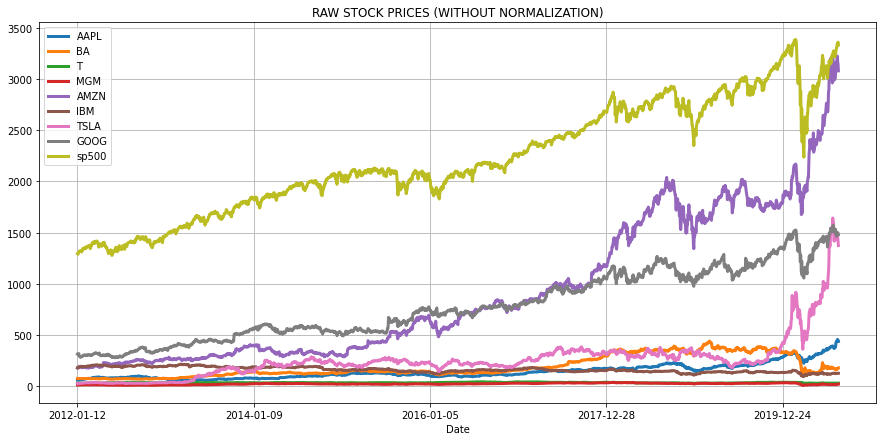

In [19]:
%matplotlib inline

# Plot the data
show_plot(stocks_df, 'RAW STOCK PRICES (WITHOUT NORMALIZATION)');

**MINI CHALLENGE #2:**
- **Print out normalized (scaled) stock prices**  


In [20]:
from pandas.core.dtypes.api import is_numeric_dtype
# The function simply divides every stock by it's price at the start date (i.e.: Date = 2012-01-12)	
stocks_norm_df = stocks_df.apply(lambda col: col/col[0] if is_numeric_dtype(col) else col)
stocks_norm_df

Date      AAPL        BA         T       MGM       AMZN       IBM  \
0     2012-01-12  1.000000  1.000000  1.000000  1.000000   1.000000  1.000000   
1     2012-01-13  0.996251  0.987949  0.998340  1.018137   1.014153  0.992301   
2     2012-01-17  1.007855  0.996424  1.004316  1.009893   1.032570  0.996954   
3     2012-01-18  1.018320  0.994040  1.006972  1.049464   1.076792  1.002880   
4     2012-01-19  1.015093  1.000662  1.009960  1.055235   1.105269  0.999834   
...          ...       ...       ...       ...       ...        ...       ...   
2154  2020-08-05  7.313297  2.308039  0.991036  1.378401  18.217644  0.694821   
2155  2020-08-06  7.568452  2.280493  0.990704  1.521847  18.331155  0.698532   
2156  2020-08-07  7.383066  2.251622  0.996680  1.568838  18.004093  0.692107   
2157  2020-08-10  7.490377  2.375977  1.002656  1.784831  17.894390  0.704016   
2158  2020-08-11  7.267614  2.385512  1.002656  1.772465  17.510772  0.702022   

           TSLA      GOOG     sp500  
0      1.000000  1.000000  1.000000  
1      0.806726  0.992615  0.995052  
2      0.941593  0.998317  0.998587  
3      0.949027  1.005193  1.009680  
4      0.947257  1.015771  1.014666  
...         ...       ...       ...  
2154  52.567080  4.698347  2.568715  
2155  52.728494  4.782805  2.585226  
2156  51.423361  4.764919  2.586862  
2157  50.214865  4.770052  2.593956  
2158  48.650974  4.719740  2.573284  

[2159 rows x 10 columns]

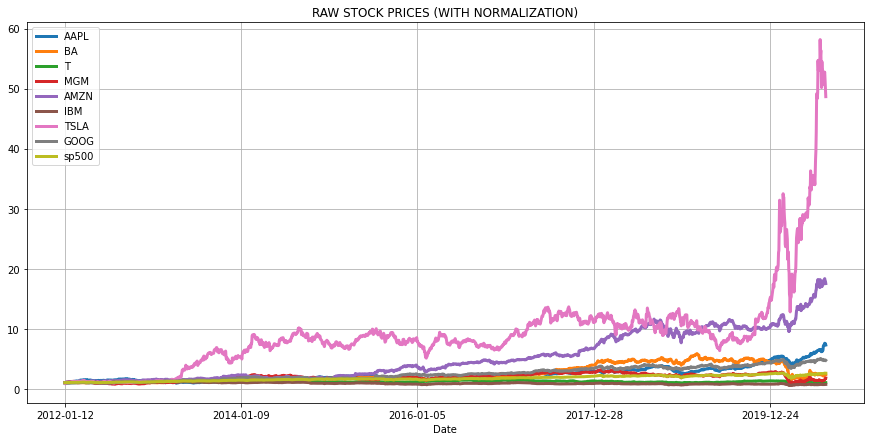

In [21]:
%matplotlib inline

# Plot the data
show_plot(stocks_norm_df, 'RAW STOCK PRICES (WITH NORMALIZATION)');

# TASK #4: PERFORM INTERACTIVE DATA VISUALIZATION

In [22]:
# Function to perform an interactive data plotting using plotly express
# Plotly.express module which is imported as px includes functions that can plot interactive plots easily and effectively. 
# Every Plotly Express function uses graph objects internally and returns a plotly.graph_objects.Figure instance. 
def interactive_plot(df, title):
  fig = px.line(title = title)
  
  # Loop through each stock (while ignoring time columns with index 0)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i) # add a new Scatter trace

  fig.show()

In [23]:
# Plot interactive chart
interactive_plot(stocks_df, 'Prices (without normalization)')

**MINI CHALLENGE #3:**
- **Plot normalized stock data in an interactive way**
- **It seems that most stocks experienced massive drops in 2020, let's assume that you own 100 shares of the S&P500 and you bought them on Feb 19th, 2020. How much did you lose (in $) by March 23rd, 2020?**


In [24]:
# Plot interactive chart
interactive_plot(stocks_norm_df, 'Prices (with normalization)')

In [25]:
# It seems that most stocks experienced massive drops in 2020, 
# let's assume that you own 100 shares of the S&P500 and you bought them on Feb 19th, 
# 2020. How much did you lose (in $) by March 23rd, 2020?
stocks_index_df = stocks_df.copy(deep=True)
stocks_index_df['Date'] = pd.to_datetime(stocks_index_df['Date'])
stocks_index_df.set_index('Date', inplace=True)
stocks_index_df.loc['2020-02-19':'2020-03-23']

AAPL          BA          T        MGM         AMZN  \
Date                                                                    
2020-02-19  323.619995  338.299988  38.439999  32.090000  2170.219971   
2020-02-20  320.299988  336.279999  38.610001  32.340000  2153.100098   
2020-02-21  313.049988  330.380005  38.549999  31.389999  2095.969971   
2020-02-24  298.179993  317.899994  38.049999  29.700001  2009.290039   
2020-02-25  288.079987  304.140015  37.349998  27.889999  1972.739990   
2020-02-26  292.649994  305.589996  37.099998  26.709999  1979.589966   
2020-02-27  273.519989  287.760010  35.730000  25.520000  1884.300049   
2020-02-28  273.359985  275.109985  35.220001  24.559999  1883.750000   
2020-03-02  298.809998  289.269989  37.180000  25.049999  1953.949951   
2020-03-03  289.320007  280.619995  36.299999  23.299999  1908.989990   
2020-03-04  302.739990  283.119995  38.180000  23.299999  1975.829956   
2020-03-05  292.920013  260.369995  37.180000  20.600000  1924.030029   
2020-03-06  289.029999  262.329987  37.029999  20.389999  1901.089966   
2020-03-09  266.170013  227.169998  34.689999  17.879999  1800.609985   
2020-03-10  285.339996  231.009995  35.849998  20.790001  1891.819946   
2020-03-11  275.429993  189.080002  34.520000  18.080000  1820.859985   
2020-03-12  248.229996  154.839996  31.330000  15.260000  1676.609985   
2020-03-13  277.970001  170.199997  34.470001  15.440000  1785.000000   
2020-03-16  242.210007  129.610001  31.809999  10.250000  1689.150024   
2020-03-17  252.860001  124.139999  33.740002   9.550000  1807.839966   
2020-03-18  246.669998  101.889999  32.849998   7.140000  1830.000000   
2020-03-19  244.779999   97.709999  31.150000   7.700000  1880.930054   
2020-03-20  229.240005   95.010002  28.450001   9.110000  1846.089966   
2020-03-23  224.369995  105.620003  26.770000   9.150000  1902.829956   

                   IBM        TSLA         GOOG        sp500  
Date                                                          
2020-02-19  150.860001  917.419983  1526.689941  3386.149902  
2020-02-20  151.220001  899.409973  1518.150024  3373.229980  
2020-02-21  149.839996  901.000000  1485.109985  3337.750000  
2020-02-24  146.429993  833.789978  1421.589966  3225.889893  
2020-02-25  141.710007  799.909973  1388.449951  3128.209961  
2020-02-26  139.750000  778.799988  1393.180054  3116.389893  
2020-02-27  133.110001  679.000000  1318.089966  2978.760010  
2020-02-28  130.149994  667.989990  1339.329956  2954.219971  
2020-03-02  134.300003  743.619995  1389.109985  3090.229980  
2020-03-03  128.899994  745.510010  1341.390015  3003.370117  
2020-03-04  134.220001  749.500000  1386.520020  3130.120117  
2020-03-05  129.550003  724.539978  1319.040039  3023.939941  
2020-03-06  127.730003  703.479980  1298.410034  2972.370117  
2020-03-09  117.809998  608.000000  1215.560059  2746.560059  
2020-03-10  124.769997  645.330017  1280.390015  2882.229980  
2020-03-11  117.970001  634.229980  1215.410034  2741.379883  
2020-03-12  102.809998  560.549988  1114.910034  2480.639893  
2020-03-13  107.949997  546.619995  1219.729980  2711.020020  
2020-03-16   99.080002  445.070007  1084.329956  2386.129883  
2020-03-17  106.650002  430.200012  1119.800049  2529.189941  
2020-03-18  103.550003  361.220001  1096.800049  2398.100098  
2020-03-19  100.339996  427.640015  1115.290039  2409.389893  
2020-03-20   95.389999  427.529999  1072.319946  2304.919922  
2020-03-23   94.769997  434.290009  1056.619995  2237.399902

In [26]:
lost = (stocks_index_df.sp500.loc['2020-03-23'] - stocks_index_df.sp500.loc['2020-02-19'])*100 
print('Between Feb 19 and Mar 23 in 2020, you have lost ${:,.2f}'.format(lost))

Between Feb 19 and Mar 23 in 2020, you have lost $-114,875.00


In [27]:
lost = stocks_index_df.sp500.loc['2020-02-19':'2020-03-23'].diff().sum()*100
print('Between Feb 19 and Mar 23 in 2020, you have lost ${:,.2f}'.format(lost))

Between Feb 19 and Mar 23 in 2020, you have lost $-114,875.00


# TASK #5: CALCULATE INDIVIDUAL STOCKS DAILY RETURNS

In [28]:
# Let's calculate daily return for a single security
# Let's take the S&P500 as an example first
df = stocks_df['sp500']

# Define a dataframe names df_daily_return 
df_daily_return = stocks_index_df.pct_change().fillna(0)*100
df_daily_return

AAPL        BA         T        MGM      AMZN       IBM  \
Date                                                                      
2012-01-12  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   
2012-01-13 -0.374946 -1.205144 -0.166006   1.813685  1.415339 -0.769869   
2012-01-17  1.164812  0.857909  0.598603  -0.809717  1.815943  0.468852   
2012-01-18  1.038382 -0.239234  0.264463   3.918367  4.282725  0.594448   
2012-01-19 -0.316937  0.666134  0.296736   0.549882  2.644634 -0.303752   
...              ...       ...       ...        ...       ...       ...   
2020-08-05  0.362467  5.579446 -0.533156   0.000000  2.109065 -0.309917   
2020-08-06  3.488923 -1.193483 -0.033501  10.406699  0.623082  0.534082   
2020-08-07 -2.449458 -1.265966  0.603217   3.087768 -1.784187 -0.919762   
2020-08-10  1.453480  5.522880  0.599604  13.767729 -0.609323  1.720552   
2020-08-11 -2.973987  0.401316  0.000000  -0.692841 -2.143792 -0.283220   

                 TSLA      GOOG     sp500  
Date                                       
2012-01-12   0.000000  0.000000  0.000000  
2012-01-13 -19.327430 -0.738516 -0.494792  
2012-01-17  16.717854  0.574410  0.355295  
2012-01-18   0.789470  0.688856  1.110793  
2012-01-19  -0.186494  1.052283  0.493866  
...               ...       ...       ...  
2020-08-05  -0.133153  0.589774  0.642974  
2020-08-06   0.307062  1.797626  0.642770  
2020-08-07  -2.475194 -0.373974  0.063303  
2020-08-10  -2.350092  0.107728  0.274222  
2020-08-11  -3.114399 -1.054744 -0.796913  

[2159 rows x 9 columns]

In [29]:
df_daily_return.sp500

Date
2012-01-12    0.000000
2012-01-13   -0.494792
2012-01-17    0.355295
2012-01-18    1.110793
2012-01-19    0.493866
                ...   
2020-08-05    0.642974
2020-08-06    0.642770
2020-08-07    0.063303
2020-08-10    0.274222
2020-08-11   -0.796913
Name: sp500, Length: 2159, dtype: float64

**MINI CHALLENGE #4:**
- **Calculate the daily return for Amazon stock.**


In [30]:
df_daily_return.AMZN

Date
2012-01-12    0.000000
2012-01-13    1.415339
2012-01-17    1.815943
2012-01-18    4.282725
2012-01-19    2.644634
                ...   
2020-08-05    2.109065
2020-08-06    0.623082
2020-08-07   -1.784187
2020-08-10   -0.609323
2020-08-11   -2.143792
Name: AMZN, Length: 2159, dtype: float64

# TASK #6: CALCULATE MULTIPLE STOCKS DAILY RETURNS

In [32]:
# Let's define a function to calculate stocks daily returns (for all stocks) 
def daily_return(df):
  return df.apply(lambda col: col.pct_change()*100 if is_numeric_dtype(col) else col).fillna(0)

In [33]:
# Get the daily returns 
stocks_daily_return = daily_return(stocks_df)

In [34]:
stocks_daily_return

Date      AAPL        BA         T        MGM      AMZN       IBM  \
0     2012-01-12  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   
1     2012-01-13 -0.374946 -1.205144 -0.166006   1.813685  1.415339 -0.769869   
2     2012-01-17  1.164812  0.857909  0.598603  -0.809717  1.815943  0.468852   
3     2012-01-18  1.038382 -0.239234  0.264463   3.918367  4.282725  0.594448   
4     2012-01-19 -0.316937  0.666134  0.296736   0.549882  2.644634 -0.303752   
...          ...       ...       ...       ...        ...       ...       ...   
2154  2020-08-05  0.362467  5.579446 -0.533156   0.000000  2.109065 -0.309917   
2155  2020-08-06  3.488923 -1.193483 -0.033501  10.406699  0.623082  0.534082   
2156  2020-08-07 -2.449458 -1.265966  0.603217   3.087768 -1.784187 -0.919762   
2157  2020-08-10  1.453480  5.522880  0.599604  13.767729 -0.609323  1.720552   
2158  2020-08-11 -2.973987  0.401316  0.000000  -0.692841 -2.143792 -0.283220   

           TSLA      GOOG     sp500  
0      0.000000  0.000000  0.000000  
1    -19.327430 -0.738516 -0.494792  
2     16.717854  0.574410  0.355295  
3      0.789470  0.688856  1.110793  
4     -0.186494  1.052283  0.493866  
...         ...       ...       ...  
2154  -0.133153  0.589774  0.642974  
2155   0.307062  1.797626  0.642770  
2156  -2.475194 -0.373974  0.063303  
2157  -2.350092  0.107728  0.274222  
2158  -3.114399 -1.054744 -0.796913  

[2159 rows x 10 columns]

**MINI CHALLENGE #5:**
- **Plot the returns vs. time using both static and interactive plots**
- **What is the maximum daily return in % values**

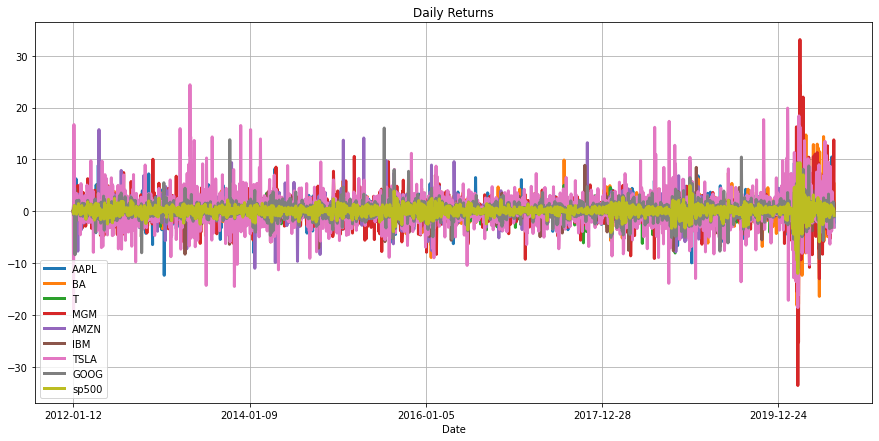

In [35]:
%matplotlib inline
# Static plot

# Plot the data
show_plot(stocks_daily_return, 'Daily Returns');

In [36]:
# Interactive plot
interactive_plot(stocks_daily_return, 'Daily Returns')

In [37]:
# What is the maximum daily return in % values
stocks_daily_return.max().loc['AAPL':]

AAPL     11.980826
BA       24.318606
T        10.022346
MGM      33.114754
AMZN     15.745701
IBM      11.301051
TSLA     24.395054
GOOG     16.052431
sp500     9.382774
dtype: object

# TASK #7: CALCULATE THE CORRELATIONS BETWEEN DAILY RETURNS 

In [38]:
# Daily Return Correlation
cm = stocks_daily_return.drop(columns=['Date']).corr()

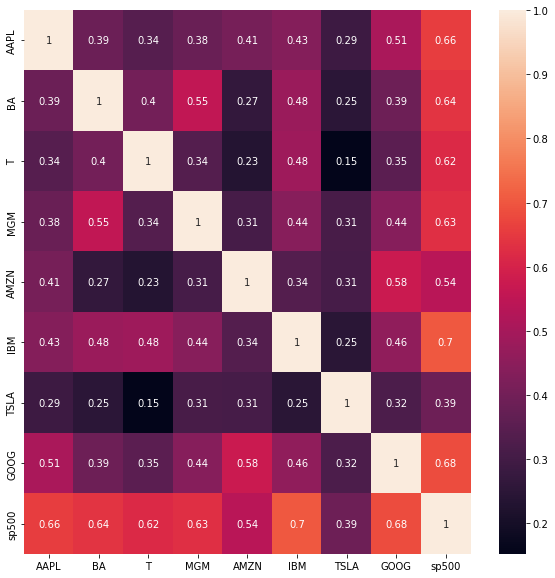

In [39]:
plt.figure(figsize=(10, 10))
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax);

**MINI CHALLENGE #6:**
- **What are the top 2 stocks that are positively correlated with the S&P500?**
- **What is the correlation between Amazon and Boeing? Comment on your answer**
- **What is the correlation between MGM and Boeing? Comment on your answer**

In [40]:
# What are the top 2 stocks that are positively correlated with the S&P500?
# Strong positive correlation between S&P500 and Google 
# Strong positive correlation between S&P500 and IBM
cm.sp500.sort_values(ascending=False).iloc[:2]

sp500    1.000000
IBM      0.703935
Name: sp500, dtype: float64

In [41]:
# What is the correlation between Amazon and Boeing? Comment on your answer
# Almost no correlation between Amazon and Beoing - totally different sectors
cm.BA.loc['AMZN']

0.26746613808364755

In [42]:
# What is the correlation between MGM and Boeing? Comment on your answer
# Some correlation exists between MGM and Boeing (Hotel and Airlines)
cm.MGM.loc['BA']

0.5542294514206465

# TASK #8: PLOT THE HISTOGRAM FOR DAILY RETURNS

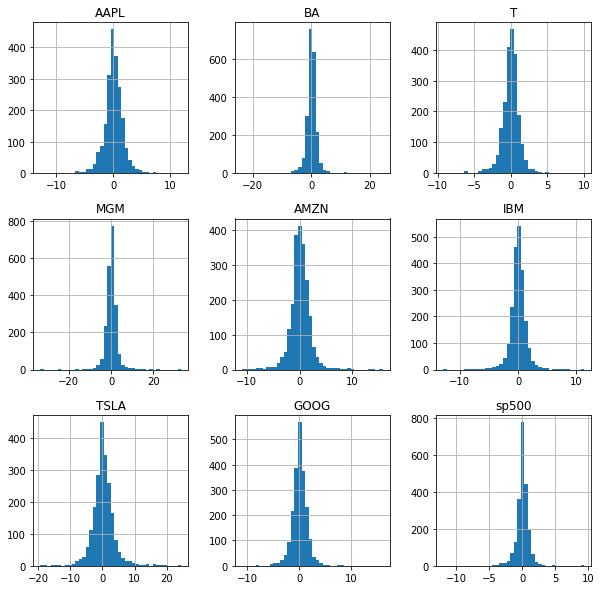

In [43]:
%matplotlib inline
# Histogram of daily returns
# Stock returns are normally distributed with zero mean 
# Notice how Tesla Standard deviation is high indicating a more volatile stock
stocks_daily_return.hist(figsize=(10, 10), bins = 40);

In [44]:
# Group all data returns together in a list
# Make a copy of the daily returns dataframe
df_hist = stocks_daily_return.copy()

# Drop the date
df_hist = df_hist.drop(columns = ['Date'])

data = []

# Loop through every column
for i in df_hist.columns:
  data.append(stocks_daily_return[i].values)
data

[array([ 0.        , -0.37494578,  1.16481192, ..., -2.44945751,
         1.45347999, -2.9739868 ]),
 array([ 0.        , -1.20514366,  0.85790887, ..., -1.26596576,
         5.52287953,  0.40131597]),
 array([ 0.        , -0.16600597,  0.59860326, ...,  0.60321716,
         0.5996036 ,  0.        ]),
 array([ 0.        ,  1.81368508, -0.8097166 , ...,  3.08776831,
        13.76772918, -0.69284065]),
 array([ 0.        ,  1.41533854,  1.8159433 , ..., -1.78418726,
        -0.60932259, -2.14379167]),
 array([ 0.        , -0.76986928,  0.46885241, ..., -0.91976211,
         1.72055219, -0.28322004]),
 array([  0.        , -19.32743009,  16.71785359, ...,  -2.47519409,
         -2.35009162,  -3.1143992 ]),
 array([ 0.        , -0.73851634,  0.57441015, ..., -0.37397414,
         0.10772812, -1.05474435]),
 array([ 0.        , -0.49479228,  0.35529545, ...,  0.06330295,
         0.27422185, -0.79691324])]

In [45]:
# Plotly's Python API contains a super powerful module known as figure factory module 
# Figure factory module includes wrapper functions that create unique chart types such as interactive subplots 
# Check this out for more information: https://plotly.com/python/figure-factory-subplots/
# Notice how Boeing, Tesla and MGM gains are losses are sometimes extreme! This will indicate a more risky investment and will be quantified later using Sharpe Ratio
fig = ff.create_distplot(data, df_hist.columns)
fig.show()

**MINI CHALLENGE #7:**
- **Based on the histogram, which of the following stocks are more risky? T or TSLA**

In [46]:
# TSLA
# Tesla standard deviation is much larger compared to T indicating a more risky security

# EXCELLENT JOB!

# **MINI CHALLENGE SOLUTIONS**

**MINI CHALLENGE #1 SOLUTION:** 
- **What is the average return of the S&P500?**
- **What is the maximum price for AMZN stock over the specified time period?** 

In [47]:
# Get the mean values
stocks_df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



AAPL      140.819823
BA        189.942700
T          35.162899
MGM        23.105743
AMZN      915.665665
IBM       161.853001
TSLA      259.600815
GOOG      783.712512
sp500    2218.749554
dtype: float64

In [48]:
# Get the standard deviation of stocks (Volatility)
stocks_df.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



AAPL      70.827601
BA       103.678586
T          3.207490
MGM        6.963847
AMZN     697.838905
IBM       25.561938
TSLA     210.988003
GOOG     334.448057
sp500    537.321727
dtype: float64

In [49]:
# Statistical data of the dataframe
stocks_df.describe()

AAPL           BA            T          MGM         AMZN  \
count  2159.000000  2159.000000  2159.000000  2159.000000  2159.000000   
mean    140.819823   189.942700    35.162899    23.105743   915.665665   
std      70.827601   103.678586     3.207490     6.963847   697.838905   
min      55.790001    67.239998    26.770000     7.140000   175.929993   
25%      89.165714   124.015000    33.040001    18.545000   316.490005   
50%     116.599998   142.419998    34.930000    23.780001   676.010010   
75%     175.019997   297.044998    37.419998    28.430000  1593.645019   
max     455.609985   440.619995    43.470001    38.029999  3225.000000   

               IBM         TSLA         GOOG        sp500  
count  2159.000000  2159.000000  2159.000000  2159.000000  
mean    161.853001   259.600815   783.712512  2218.749554  
std      25.561938   210.988003   334.448057   537.321727  
min      94.769997    22.790001   278.481171  1278.040039  
25%     142.769997   184.595001   527.214416  1847.984985  
50%     156.949997   231.960007   737.599976  2106.629883  
75%     185.974998   307.350006  1079.744995  2705.810059  
max     215.800003  1643.000000  1568.489990  3386.149902

**MINI CHALLENGE #2 SOLUTION:**
- **Print out normalized (scaled) stock prices**  


In [50]:
# Function to normalize the prices based on the initial price
# The function simply divides every stock by it's price at the start date (i.e.: Date = 2012-01-12)	
def normalize(df):
  x = df.copy()

  # Loop through each stock (while ignoring time columns with index 0)
  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]
  return x

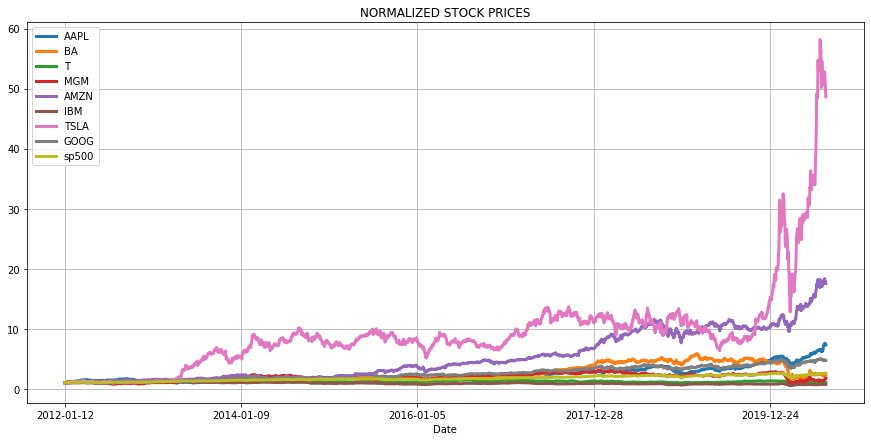

In [51]:
# Plot normalized data
# Notice the massive gains in Tesla Stock compared to Amazon (second place)
show_plot(normalize(stocks_df), 'NORMALIZED STOCK PRICES')

**MINI CHALLENGE #3 SOLUTION:**
- **Plot normalized stock data in an interactive way**
- **It seems that most stocks experienced massive drops in 2020, let's assume that you own 100 shares of the S&P500 and you bought them on Feb 19th, 2020. How much did you lose (in $) by March 23rd, 2020?**


In [52]:
# Plot normalized interactive chart
interactive_plot(normalize(stocks_df), 'Normalized Prices')


In [53]:
# S&P500 dropped from $3386.15 on Feb 19th, 2020 to $2237.4 by March 23rd, 2020 
# Net loss = $3386.15 - $2237.4 = $1148.75

**MINI CHALLENGE #4 SOLUTION:**
- **Calculate the daily return for Amazon stock.**


In [54]:
df = stocks_df['AMZN']

**MINI CHALLENGE #5 SOLUTION:**
- **Plot the returns vs. time using both static and interactive plots**
- **What is the maximum daily return in % values**

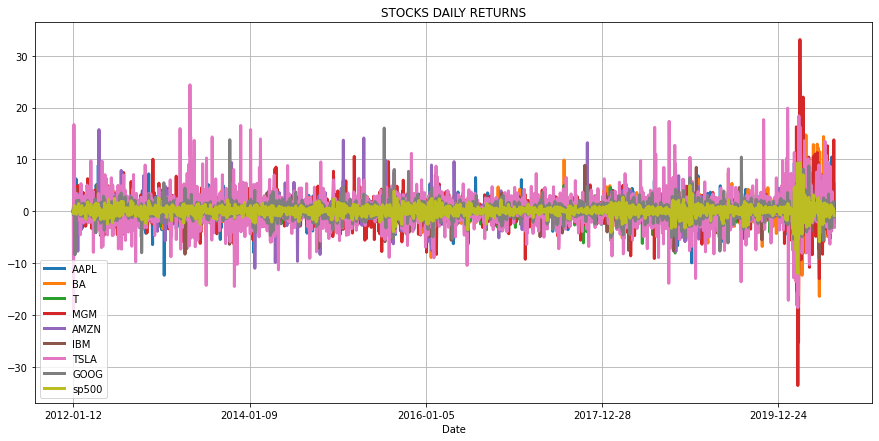

In [55]:
# Plot the daily returns
# Notice huge drops in MGM around March 2020 (Pandemic effect)
show_plot(stocks_daily_return, 'STOCKS DAILY RETURNS')

In [56]:
# Plot the interactive chart
# Zoom in to view the sharp decline during March 2020
interactive_plot(stocks_daily_return, 'STOCKS DAILY RETURNS')

**MINI CHALLENGE #6 SOLUTION:**
- **What are the top 2 stocks that are positively correlated with the S&P500?**
- **What is the correlation between Amazon and Boeing? Comment on your answer**
- **What is the correlation between MGM and Boeing? Comment on your answer**

In [57]:
# Strong positive correlation between S&P500 and Google 
# Strong positive correlation between S&P500 and IBM
# Almost no correlation between Amazon and Beoing - totally different sectors
# Some correlation exists between MGM and Boeing (Hotel and Airlines)

**MINI CHALLENGE #7 SOLUTION:**
- **Based on the histogram, which of the following stocks are more risky? T or TSLA**

In [58]:
# Tesla standard deviation is much larger compared to T indicating a more risky security